# Import nltk tools

In [634]:
import pandas as pd
import numpy as np

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Wrod processing

In [635]:
data = pd.read_csv('Matrix/f_matrix.csv')

* Name the index as "MATERIAL_IDs"
* The matrix must has it unrepeated Id before import to here, show as the "Unnamed: 0".

In [636]:
data.head()

,Unnamed: 0,material,fabric
0,0,", lm792, shell fabric at hood, above chest, lo...",1
1,1,", sotl085-pu01, shell fabric at hood, above ch...",1
2,2,", lm792, shell fabric at mid chest panels, , , ,",1
3,3,", sotl085-pu01, shell fabric at mid chest pane...",1
4,4,", ym11-3527, stretch mesh , , , , back pocket bag",1


* Change the col "Unnamed: 0" as "MATERIAL_ID"

In [637]:
data.rename( columns = {'Unnamed: 0': 'MATERIAL_ID'}, inplace = True)

In [638]:
data.head()

,MATERIAL_ID,material,fabric
0,0,", lm792, shell fabric at hood, above chest, lo...",1
1,1,", sotl085-pu01, shell fabric at hood, above ch...",1
2,2,", lm792, shell fabric at mid chest panels, , , ,",1
3,3,", sotl085-pu01, shell fabric at mid chest pane...",1
4,4,", ym11-3527, stretch mesh , , , , back pocket bag",1


* Set the original index as Index

In [639]:
data.set_index('MATERIAL_ID', inplace = True)

In [640]:
data.tail()

,material,fabric
MATERIAL_ID,,
9991,", Hang tag, Nilorn, 235B, Big Halti hang tag, ...",0
9992,", Hang tag, Nilorn, 206B, Active Dry hang tag,...",0
9993,", Hang tag, PrimaLoft One Hangtag#10061565, Fr...",0
9994,", Thread, Sewing thread, , , , From CoatsOpti",0
9995,", Thread, Top stitching thread, , , , From Coa...",0


## Nltk Function

In [641]:
def nltk_convert(col_of_df):
    '''
    Parameter of this function is a column of a dataFrame.
    
    '''
    # difine Stop words
    stop_words = set(stopwords.words('english'))
    # Difine Stemmer
    stemmer = SnowballStemmer('english')
    
    # converts to lower case and splits up the words
    words = word_tokenize(col_of_df)
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        # if word is not in the stop_words list and is not a alpha.
        if word not in stop_words and word.isalpha():
#             filtered_words.append(stemmer.stem(word))
            filtered_words.append(word)
            
    return filtered_words

* Test the function, with row 0, in column 'material'

In [642]:
nltk_convert(data.at[0, 'material'])

['shell',
 'fabric',
 'hood',
 'chest',
 'lower',
 'front',
 'body',
 'back',
 'body',
 'sleeves',
 'facing',
 'fabric',
 'windflap',
 'hood',
 'shockcord',
 'tunnel',
 'self',
 'fabric',
 'seam',
 'binding',
 'needed',
 'shockcord',
 'tunnel']

## Applying to the matrix
* the variable "nested_list" will hold the result.
* It is a series in this moment.

In [643]:
%%time
nested_list = data.material.apply(nltk_convert)

CPU times: user 3.46 s, sys: 354 ms, total: 3.82 s
Wall time: 3.94 s


In [644]:
type(nested_list)

pandas.core.series.Series

## True and False categories
* Exact the index of fabric materials, and non fabric materials

In [645]:
doc_ids_fabric = data[data.fabric == 1].index
doc_ids_trim = data[data.fabric ==0].index

In [646]:
doc_ids_trim

Int64Index([   6,    7,    8,    9,   10,   11,   12,   13,   14,   15,
            ...
            9986, 9987, 9988, 9989, 9990, 9991, 9992, 9993, 9994, 9995],
           dtype='int64', name='MATERIAL_ID', length=7884)

### Get materials back by index
* Exact the strings in col 'material' by the index of doc_ids_fabric

In [647]:
nested_list_fabric = nested_list.loc[doc_ids_fabric]

In [648]:
nested_list_fabric

MATERIAL_ID
0       [shell, fabric, hood, chest, lower, front, bod...
1       [shell, fabric, hood, chest, lower, front, bod...
2                     [shell, fabric, mid, chest, panels]
3                     [shell, fabric, mid, chest, panels]
4                      [stretch, mesh, back, pocket, bag]
                              ...                        
9949    [Lining, Local, plain, brushed, terinda, Linin...
9950    [Lining, Local, plain, brushed, terinda, Lower...
9951    [Wadding, Primaloft, Gold, Insulation, Body, s...
9952       [Wadding, Primaloft, Silver, Insulation, Hood]
9953       [thin, Front, inner, list, vent, inner, lists]
Name: material, Length: 2112, dtype: object

* by the index of doc_ids_trim

In [649]:
nested_list_trim = nested_list.loc[doc_ids_trim]

In [650]:
nested_list_trim.shape[0]

7884

## Number of Distinct words
* The fabric

In [651]:
flat_list_fabric =[item for sublist in nested_list_fabric for item in sublist]

In [652]:
fabric_words = pd.Series(flat_list_fabric).value_counts()

In [653]:
fabric_words[:10]

pocket       457
lining       420
body         399
polyester    378
shell        373
fabric       319
nylon        294
supplied     252
hood         236
main         226
dtype: int64

* The Trims

In [654]:
flat_list_trim = [item for sublist in nested_list_trim for item in sublist]

In [655]:
trim_words = pd.Series(flat_list_trim).value_counts()

In [656]:
trim_words.head()

pocket    1346
zipper    1323
label     1292
left      1059
front     1002
dtype: int64

# Generate Vocabulary
## Top 10 words in Matrix (fabric and trim)

* It is same as function the nltk_convert, the difference is in the end of the funciton, it not append word directly, but word converted by function stemmer.stem.

In [657]:
def stemmered_nltk_convert(col_of_df):
    '''
    Parameter of this function is a column of a dataFrame.
    
    '''
    # difine Stop words
    stop_words = set(stopwords.words('english'))
    # Difine Stemmer
    stemmer = SnowballStemmer('english')
    
    # converts to lower case and splits up the words
    words = word_tokenize(col_of_df)
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        # if word is not in the stop_words list and is not a alpha.
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
            
    return filtered_words

In [658]:
%%time
stemmed_nested_list = data.material.apply(stemmered_nltk_convert)

CPU times: user 4.56 s, sys: 346 ms, total: 4.9 s
Wall time: 4.97 s


* Get flat list for all words

In [659]:
flat_stemmed_nested_list = [item for sublist in stemmed_nested_list for item in sublist]

* Turn it to a series

In [660]:
unique_words = pd.Series(flat_stemmed_nested_list).value_counts()

In [661]:
unique_words

pocket      2271
zipper      1641
label       1543
front       1238
left        1093
            ... 
neckband       1
cab            1
elastan        1
zig            1
tepe           1
Length: 1102, dtype: int64

In [662]:
unique_words.head()

pocket    2271
zipper    1641
label     1543
front     1238
left      1093
dtype: int64

* Set the size of vacabulary
* This size need to be tested a lot, in this cace, follow the e-mail processing lecture, I takes 10 % of total particular words

In [663]:
VOCAB_SIZE = 900

In [664]:
frequent_words = unique_words[0:VOCAB_SIZE]

In [665]:
print('Most common words: \n', frequent_words[:10])

Most common words: 
 pocket    2271
zipper    1641
label     1543
front     1238
left      1093
back      1052
seam       992
side       980
hood       944
line       860
dtype: int64


## Create Vocabulary with WORD_ID

In [666]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index = word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,pocket
1,zipper
2,label
3,front
4,left


* Save the vocabulary

In [667]:
vocab.to_csv('Matrix/garment_vocabulary.csv')

* Test the any word to see if it is in the vocabulary

In [668]:
'steve' in set(vocab.VOCAB_WORD)

False

## Search out the material with most token

In [669]:
clean_material_lengths = [len(sublist) for sublist in stemmed_nested_list]
print('Nr wrods in the longest material:', max(clean_material_lengths))

Nr wrods in the longest material: 27


In [670]:
print('Material position in the list', np.argmax(clean_material_lengths))

Material position in the list 645


In [671]:
stemmed_nested_list[np.argmax(clean_material_lengths)]

['libolon',
 'shell',
 'pes',
 'tpu',
 'cm',
 'hood',
 'collar',
 'bodi',
 'bottom',
 'part',
 'sleev',
 'airvent',
 'flap',
 'face',
 'hood',
 'collar',
 'bodi',
 'sleev',
 'hem',
 'chest',
 'pocket',
 'storm',
 'flap',
 'cf',
 'zip',
 'snowskirt',
 'garag']

# Generate Features & Spare Matrix
### Creating a DataFrame with one word per column

In [672]:
type(stemmed_nested_list)

pandas.core.series.Series

In [673]:
type(stemmed_nested_list.tolist())

list

In [674]:
word_col_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_col_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,shell,fabric,hood,chest,lower,front,bodi,back,bodi,sleev,...,fabric,seam,bind,need,shockcord,tunnel,None,None,None,None
1,shell,fabric,hood,chest,lower,front,bodi,back,bodi,sleev,...,fabric,seam,bind,need,shockcord,tunnel,None,None,None,None
2,shell,fabric,mid,chest,panel,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,shell,fabric,mid,chest,panel,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,stretch,mesh,back,pocket,bag,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,hang,tag,nilorn,big,halti,hang,tag,all,hangtag,fix,...,None,None,None,None,None,None,None,None,None,None
9992,hang,tag,nilorn,activ,dri,hang,tag,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9993,hang,tag,primaloft,one,hangtag,free,charg,primaloft,black,insul,...,None,None,None,None,None,None,None,None,None,None
9994,thread,sew,thread,from,coatsopti,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


## Traning Set and Test Set
* Must import the method "train_test_split()" from sklearn

In [675]:
X_train, X_test, y_train, y_test = train_test_split(word_col_df, data.fabric,
                                                    test_size = 0.3)

In [676]:
print('Nr of traning samples', X_train.shape[0])
print('Fraction of traning set', X_train.shape[0] / word_col_df.shape[0])

Nr of traning samples 6997
Fraction of traning set 0.6999799919967987


In [677]:
X_train.index.name = X_test.index.name = 'MATERIAL_ID'
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
2329,web,flat,web,tape,width,stopper,attach,loop,bottom,hem,...,None,None,None,None,None,None,None,None,None,None
7700,wmns,main,label,line,front,right,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7025,clear,zip,tie,front,left,belt,loop,attach,hang,tag,...,None,None,None,None,None,None,None,None,None,None
6554,bond,film,hood,brim,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3686,elast,cord,bottom,adjust,hood,adjust,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [678]:
y_train.head()

MATERIAL_ID
2329    0
7700    0
7025    0
6554    0
3686    0
Name: fabric, dtype: int64

## Sparse Matrix for the traning data
* Get vocabulary turned as an Index:

In [679]:
word_index = pd.Index(vocab.VOCAB_WORD)
type(word_index[3])

str

In [680]:
y_train.shape[0]

6997

### Sparse Matrix Function

In [681]:
def make_sparse_matrix(df, indexed_words, labels):
    """
    Returns a sparse matrix as dataframe
    """
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'MATERIAL_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
                
    return pd.DataFrame(dict_list)

## Training data
### Applying to the traning set

In [682]:
%%time
sparse_train_df = make_sparse_matrix(X_train, word_index, y_train)

CPU times: user 2.05 s, sys: 32.9 ms, total: 2.09 s
Wall time: 2.16 s


In [683]:
sparse_train_df

,LABEL,MATERIAL_ID,OCCURENCE,WORD_ID
0,0,2329,1,52
1,0,2329,1,65
2,0,2329,1,52
3,0,2329,1,41
4,0,2329,1,109
...,...,...,...,...
47226,0,4615,1,32
47227,0,6909,1,11
47228,0,6909,1,1
47229,0,6909,1,13


In [684]:
sparse_train_df.shape

(47231, 4)

### Group by the DOC_ID

In [685]:
train_grouped = sparse_train_df.groupby(['MATERIAL_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped

OCCURENCE
MATERIAL_ID WORD_ID LABEL           
1           3       1              1
            5       1              1
            6       1              1
            8       1              2
            18      1              1
...                              ...
9993        247     0              1
            266     0              1
            383     0              2
            522     0              1
            690     0              1

[44035 rows x 1 columns]

* Distribute the DOC_ID to each row

In [686]:
train_grouped = train_grouped.reset_index()

In [687]:
train_grouped

,MATERIAL_ID,WORD_ID,LABEL,OCCURENCE
0,1,3,1,1
1,1,5,1,1
2,1,6,1,1
3,1,8,1,2
4,1,18,1,1
...,...,...,...,...
44030,9993,247,0,1
44031,9993,266,0,1
44032,9993,383,0,2
44033,9993,522,0,1


### Save Traning Data
* We save it as a txt file, with only numbers of the IDs, Occurances, label, as showed above. 

In [688]:
np.savetxt('Training Data/f_sparse_traning_data', train_grouped, fmt = '%d')

## Test Data
* The way to create it is basically same way as treating traning data.

In [689]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
8783,address,label,line,left,side,seam,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8480,self,fabric,pull,ball,vent,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4060,size,woven,label,mmg,alpha,women,necklin,center,None,None,...,None,None,None,None,None,None,None,None,None,None
2254,label,satin,label,print,wearer,left,side,seam,cm,bottom,...,None,None,None,None,None,None,None,None,None,None
9984,care,label,satin,care,label,left,side,seam,snowgait,None,...,None,None,None,None,None,None,None,None,None,None


In [690]:
y_test.head()

MATERIAL_ID
8783    0
8480    0
4060    0
2254    0
9984    0
Name: fabric, dtype: int64

In [691]:
%%time
sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)

CPU times: user 839 ms, sys: 11.8 ms, total: 850 ms
Wall time: 887 ms


In [692]:
test_grouped = sparse_test_df.groupby(['MATERIAL_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped.head()

,MATERIAL_ID,WORD_ID,LABEL,OCCURENCE
0,0,3,1,1
1,0,5,1,1
2,0,6,1,1
3,0,8,1,2
4,0,18,1,1


In [693]:
np.savetxt('Training Data/f_sparse_test_data', test_grouped, fmt = '%d')

# Full Matrix
* Create anempty df first

### Columns of Full Matrix
* The empty df with column 'DOC_ID', in the case I use 'MATERIAL_ID'
* Second column is 'CATEGORY'
* The rest column is number from 0 to the number of words in vocabulary.

In [694]:
column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))

### Rows of Full Matrix
* If consists of Material_ID in Training Data
* Numpy method np.unique() will take a number 1 time, even it occurs many time in the Traning Data.
* Import the traning data we saved as txt

In [695]:
TRANING_DATA = 'Training Data/f_sparse_traning_data'

* Open is by Numpy

In [696]:
sparse_train_data = np.loadtxt(TRANING_DATA, delimiter = ' ', dtype=int)

In [697]:
index_names = np.unique(sparse_train_data[:, 0])

### Form the Data Frame
* Create an empty df, columned by column_names, indexed by index_names
* Fullfill all the cell with value "0"

In [698]:
full_train_data = pd.DataFrame(index= index_names, columns = column_names)
full_train_data.fillna(value = 0, inplace = True)
full_train_data.shape

(6992, 902)

## Make a Full matrix function

In [699]:
def make_full_matrix(sparse_matrix, nr_words, doc_idx = 0, word_idx = 1, cat_idx = 2, freq_idx = 3):
    column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
    doc_id_names = np.unique(sparse_matrix[:,0])
    full_matrix = pd.DataFrame(index = doc_id_names, columns = column_names)
    full_matrix.fillna(value=0, inplace=True)
    
    for i in range(sparse_matrix.shape[0]):
        doc_nr = sparse_matrix[i][doc_idx]
        word_id = sparse_matrix[i][word_idx]
        label = sparse_matrix[i][cat_idx]
        occurrence = sparse_matrix[i][freq_idx]
        
        full_matrix.at[doc_nr, 'MATERIAL_ID'] = doc_nr
        full_matrix.at[doc_nr, 'CATEGORY'] = label
        full_matrix.at[doc_nr, word_id] = occurrence
        
    full_matrix.set_index('MATERIAL_ID', inplace = True)
    return full_matrix

In [700]:
%%time
full_train_data = make_full_matrix(sparse_train_data, VOCAB_SIZE)

CPU times: user 3.06 s, sys: 147 ms, total: 3.2 s
Wall time: 3.13 s


In [701]:
full_train_data

,CATEGORY,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,1,0,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9986,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9990,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Calculating the probability of fabric

In [702]:
full_train_data.CATEGORY.size

6992

In [703]:
full_train_data.CATEGORY.sum()

1475

In [704]:
prob_fabric = full_train_data.CATEGORY.sum() / full_train_data.CATEGORY.size
print('Probability of fabric is', prob_fabric)

Probability of fabric is 0.21095537757437072


# Count each material in train_data have how many tokens
## Full train Features
* It is very simple. The whole df of train_data without the column 'CATEGORY' is the Full train Features
* Create a new df with no column 'CATEGORY'

In [705]:
full_train_features = full_train_data.loc[:, full_train_data.columns != 'CATEGORY']

In [706]:
full_train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Number of tokens each material has in train_data
* We added up all values in row direction, to get sum of each row 

In [707]:
material_train_data = full_train_features.sum(axis = 1)
material_train_data.shape # Show how many materials in train_data

(6992,)

In [708]:
material_train_data # Show how many words each material in train_data has

MATERIAL_ID
1       23
2        4
4        5
5        5
6       10
        ..
9983    10
9986     8
9990     9
9992     7
9993    11
Length: 6992, dtype: int64

* Total number of words in train_data

In [709]:
total_words_train_data = material_train_data.sum()
total_words_train_data

47231

#### Token of fabric in train_data
* Number of particular words of category 1, the fabric, in train_data
* The word can be called "token"

In [710]:
f_in_train_data = material_train_data[full_train_data.CATEGORY == 1]
f_in_train_data.shape
# 1379 materials in train_data is fabric

(1475,)

In [711]:
f_token_in_train_data = f_in_train_data.sum()
f_token_in_train_data
# The total words in Category 1, the fabric, in the train_data

9493

#### Token of trim in train_data
* Number of particular words of category 0, the trim, in train_data

In [712]:
t_in_train_data = material_train_data[full_train_data.CATEGORY == 0]
t_in_train_data.shape 
# Total, 5026 materials in train_data is trim

(5517,)

In [713]:
t_token_in_train_data = t_in_train_data.sum()
t_token_in_train_data 
# Total words in Category 0, the trim, in the train_data

37738

### Average number of words in fabric and trim
* In this case, CATEGORY 1 is fabric, 0 is trim

In [714]:
print('Average nr of words in fabric {:.0f}'.format(f_token_in_train_data / f_in_train_data.shape[0]))
print('Average nr of words in trim {:.0f}'.format(t_token_in_train_data / t_in_train_data.shape[0]))

Average nr of words in fabric 6
Average nr of words in trim 7


In [715]:
# The snippet is for testing if the calculating get problem.
# The answer should eaquls to 0
material_train_data.shape[0] - f_in_train_data.shape[0] - t_in_train_data.shape[0]

0

# Count each token's frequency in both Category
## Full train Features of Fabric
* It is very simple. The df of train_data in 'CATEGORY'1, and without the column 'CATEGORY' is the Full train Features of Fabric

In [716]:
f_full_train_features = full_train_features.loc[full_train_data.CATEGORY == 1]

In [717]:
f_full_train_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9948,1,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
9949,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


## Full train feature of trim

In [718]:
t_full_train_features = full_train_features.loc[full_train_data.CATEGORY == 0]

In [719]:
t_full_train_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
6,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9986,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9990,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Frequency of tokens in fabric in train_data
* We add up all value in column direction to get sum of each column.
* The sum represents each word occurs how many time in the category 1, the fabric.
* It is possible that some words in vocabulary never appear in this category, so we need "+ 1" to this token. Since later we'll divide it to get the percentage, if you divide 0, it may cause error.

In [720]:
summed_f_tokens_in_train_data = f_full_train_features.sum(axis = 0) + 1

In [721]:
summed_f_tokens_in_train_data

0      395
1        8
2        6
3      136
4       19
      ... 
895      1
896      3
897      1
898      1
899      1
Length: 900, dtype: int64

### Frequency of tokens in trim in train_data
* The way treat it as treating with fabric

In [722]:
summed_t_tokens_in_train_data = t_full_train_features.sum(axis = 0) + 1

In [723]:
summed_t_tokens_in_train_data

0      1195
1      1144
2      1100
3       735
4       764
       ... 
895       3
896       1
897       2
898       1
899       1
Length: 900, dtype: int64

# Probability of tokens
* Why here not only divided the frequency of each token by total tokens but also the size of vocabulary? It is becasue we add "+ 1" for each word when counting frequency, so add the size of vocabulary is for balancing the number back.

## P of Training Set 
### Probability of tokens in fabric in train_data
* ### P( Token | fabric )
* Take the each summed up occurance divided by the total nubmer of token in category of fabric.

In [724]:
prob_tokens_fabric_train_set = summed_f_tokens_in_train_data / (f_token_in_train_data + VOCAB_SIZE)

In [725]:
f_token_in_train_data

9493

In [726]:
prob_tokens_fabric_train_set

0      0.038006
1      0.000770
2      0.000577
3      0.013086
4      0.001828
         ...   
895    0.000096
896    0.000289
897    0.000096
898    0.000096
899    0.000096
Length: 900, dtype: float64

### Probability of tokens in trim in train_data
* ### P( Token | trim )

In [727]:
prob_tokens_trim_train_set = summed_t_tokens_in_train_data / (t_token_in_train_data + VOCAB_SIZE)

In [728]:
prob_tokens_trim_train_set

0      0.030928
1      0.029608
2      0.028469
3      0.019023
4      0.019773
         ...   
895    0.000078
896    0.000026
897    0.000052
898    0.000026
899    0.000026
Length: 900, dtype: float64

* Check if the number correct.
* The answer should be "1"

In [729]:
prob_tokens_trim_train_set.sum()

0.9999999999999999

### Probability of tokens in train_data
* ### P (Token)

In [730]:
prob_tokens_all_train_set = full_train_features.sum(axis = 0) / total_words_train_data

In [731]:
prob_tokens_all_train_set

0      0.033622
1      0.024348
2      0.023374
3      0.018399
4      0.016536
         ...   
895    0.000042
896    0.000042
897    0.000021
898    0.000000
899    0.000000
Length: 900, dtype: float64

In [732]:
prob_tokens_all_train_set.sum()

1.0

### Save the trained Model
* P( Token | fabric )
* P( Token | trim )
* P ( Token )

In [733]:
np.savetxt('Training Data/prob_tokens_f_in_train_data' ,prob_tokens_fabric_train_set)
np.savetxt('Training Data/prob_tokens_t_in_train_data', prob_tokens_trim_train_set)
np.savetxt('Training Data/prob_tokens_all_in_train_data', prob_tokens_all_train_set)

## P of Test Set
### Probability of tokens in trim in train_data
* ### P( Token | trim )

* Start from Sparse Matrix of test_set
* Trun the Sparse Matrix to Full Matrix
* Get the number of word of material by summing each row of Full Matrix
* Get the frequency of each word by summing each column of Full Matrix
* Get all this result from test set : P ( Token | fabric ), P (Token | trim ), P ( Token ) 
 

### Full matrix of test data
#### Import test data Sparse Matrix

In [734]:
TEST_DATA = 'Training Data/f_sparse_test_data'
sparse_test_data = np.loadtxt(TEST_DATA, delimiter = ' ', dtype = int )

#### Create a empty Full Matrix
* Column and row of Full Matrix

In [735]:
column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
index_names = np.unique(sparse_test_data[:, 0]) # 1 material_id only for 1 row, without duplicated

#### The custom function make_full_matrix
* empty dataFrame for Full matrix 
* Filled the values from sparse matrix by column match to WORD_ID, the row match to MATERIAL_ID

In [736]:
%%time
full_test_data = make_full_matrix(sparse_test_data, VOCAB_SIZE) 

CPU times: user 1.42 s, sys: 57.1 ms, total: 1.48 s
Wall time: 1.32 s


In [737]:
full_test_data

,CATEGORY,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,1,0,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,1,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9991,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Probability in test data
#### fabric

In [738]:
full_test_data.CATEGORY.size

2997

In [739]:
full_test_data.CATEGORY.sum()

634

In [740]:
prob_fabric_test_data = full_test_data.CATEGORY.sum() / full_test_data.CATEGORY.size
print('Probability of fabric in test_set', prob_fabric_test_data)

Probability of fabric in test_set 0.21154487821154488


### Full Features of test_set

In [741]:
full_test_features = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']

In [742]:
full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9991,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Number of tokens each material has in test_data

In [743]:
material_test_data = full_test_features.sum(axis = 1)
material_test_data[:5]

MATERIAL_ID
0     23
3      4
8      9
9      7
13    10
dtype: int64

* Total number of words in test_data

In [744]:
total_words_test_data = material_test_data.sum()
total_words_test_data

20039

#### Token of fabric in test_data

In [745]:
f_in_test_data = material_test_data[full_test_data.CATEGORY == 1]
f_in_test_data.shape

(634,)

In [746]:
f_token_in_test_data = f_in_test_data.sum()
f_token_in_test_data

3974

#### Token of trim in test_data

In [747]:
t_in_test_data = material_test_data[full_test_data.CATEGORY == 0]
t_in_test_data.shape

(2363,)

In [748]:
t_token_in_test_data = t_in_test_data.sum()
t_token_in_test_data

16065

#### Average number of words in fabric and trim in test_data

In [749]:
print('Average nr of words in fabric {:.0f}'.format(f_token_in_test_data / f_in_test_data.shape[0]))
print('Average nr of words in trim {:.0f}'.format(t_token_in_test_data / t_in_test_data.shape[0]))

Average nr of words in fabric 6
Average nr of words in trim 7


### Frequency of tokens in test_data
* Full feature of fabric in test_data

In [750]:
f_full_test_features = full_test_features.loc[full_test_data.CATEGORY == 1]
f_full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,1,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
69,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
70,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9881,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9884,0,0,0,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


* Full feature of trim in test_data

In [751]:
t_full_test_features = full_test_features.loc[full_test_data.CATEGORY == 0]
t_full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
8,1,1,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9991,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Frequency of tokens in fabric in test_data

In [752]:
summed_f_tokens_in_test_data = f_full_test_features.sum(axis = 0) +1 
summed_f_tokens_in_test_data

0      169
1        7
2        6
3       68
4        4
      ... 
895      1
896      1
897      1
898      1
899      1
Length: 900, dtype: int64

#### Frequency of tokens in trim in test_data

In [753]:
summed_t_tokens_in_test_data = t_full_test_features.sum(axis = 0) +1 
summed_t_tokens_in_test_data

0      516
1      486
2      435
3      303
4      310
      ... 
895      1
896      1
897      2
898      3
899      3
Length: 900, dtype: int64

## P of Test Set
* ### P( Token | fabric )

In [754]:
prob_tokens_fabric_test_set = summed_f_tokens_in_test_data / (f_token_in_test_data + VOCAB_SIZE)

In [755]:
prob_tokens_fabric_test_set

0      0.034674
1      0.001436
2      0.001231
3      0.013952
4      0.000821
         ...   
895    0.000205
896    0.000205
897    0.000205
898    0.000205
899    0.000205
Length: 900, dtype: float64

* ### P( Token | trim )

In [756]:
prob_tokens_trim_test_set = summed_t_tokens_in_test_data / (t_token_in_test_data + VOCAB_SIZE)

In [757]:
prob_tokens_trim_test_set

0      0.030416
1      0.028647
2      0.025641
3      0.017860
4      0.018273
         ...   
895    0.000059
896    0.000059
897    0.000118
898    0.000177
899    0.000177
Length: 900, dtype: float64

* ### P( Token )

In [758]:
prob_tokens_all_test_set = full_test_features.sum(axis = 0) / total_words_test_data

In [759]:
prob_tokens_all_test_set

0      0.034084
1      0.024502
2      0.021907
3      0.018414
4      0.015570
         ...   
895    0.000000
896    0.000000
897    0.000050
898    0.000100
899    0.000100
Length: 900, dtype: float64

In [760]:
prob_tokens_all_test_set.sum()

1.0

### Save the test Model
* P( Token | fabric )
* P( Token | trim )
* P ( Token )

In [761]:
np.savetxt('Training Data/prob_tokens_f_in_test_data' ,prob_tokens_fabric_test_set)
np.savetxt('Training Data/prob_tokens_t_in_test_data', prob_tokens_trim_test_set)
np.savetxt('Training Data/prob_tokens_all_in_test_data', prob_tokens_all_test_set)

# Joint probability
* Get the the full feature of test_set
* Get full target of test_set
* Take each cell in Full features of test_set times the probability of fabric in train_set

### Full feature of test_set

In [762]:
full_test_features = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']
full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9991,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Full target of test_set

In [763]:
full_test_target = full_test_data.CATEGORY
full_test_target

MATERIAL_ID
0       1
3       1
8       0
9       0
13      0
       ..
9988    0
9989    0
9991    0
9994    0
9995    0
Name: CATEGORY, Length: 2997, dtype: int64

### Probability of fabric in train_set
* The frequancy of tokens in test_set x The probability of tokens in train_set

In [764]:
prob_tokens_fabric_train_set

0      0.038006
1      0.000770
2      0.000577
3      0.013086
4      0.001828
         ...   
895    0.000096
896    0.000289
897    0.000096
898    0.000096
899    0.000096
Length: 900, dtype: float64

In [765]:
joint_pty = full_test_features.dot(prob_tokens_fabric_train_set)
joint_pty

MATERIAL_ID
0       0.271914
3       0.060329
8       0.092081
9       0.043683
13      0.033099
          ...   
9988    0.006158
9989    0.006639
9991    0.041566
9994    0.001828
9995    0.003849
Length: 2997, dtype: float64

# Prior
* Prior is the percentage of event that we get from the datas.
* If we want to count the fabric, Prior in this case is the probability of fabric.
* numbers of fabric / total material.

P( fabric | material )  = 
P( material | fabric ) * P( fabric) / P( material )


# Joint probability in log format
* Fabric joint prob in log format

In [766]:
joint_log_fabric = full_test_features.dot(np.log(prob_tokens_fabric_train_set) - np.log(prob_tokens_all_train_set)) + np.log(prob_fabric) 

In [767]:
joint_log_fabric[:5]

MATERIAL_ID
0    NaN
3    NaN
8    NaN
9    NaN
13   NaN
dtype: float64

* Trim joint prob in log format

In [768]:
joint_log_trim = full_test_features.dot(np.log(prob_tokens_trim_train_set) - np.log(prob_tokens_all_train_set)) + np.log(1 - prob_fabric) 

In [769]:
joint_log_trim[:5]

MATERIAL_ID
0    NaN
3    NaN
8    NaN
9    NaN
13   NaN
dtype: float64

## Simplify Joint probability in log format
* Only in the comparison situation can take away the snippet, in other condition, it will lead to a wrong result.

In [770]:
joint_log_fabric = full_test_features.dot(np.log(prob_tokens_fabric_train_set)) + np.log(prob_fabric)
joint_log_trim = full_test_features.dot(np.log(prob_tokens_trim_train_set)) + np.log(1-prob_fabric)

# Prediction

In [771]:
prediction = joint_log_fabric > joint_log_trim

* Check if the prediction got wrong.
* If the joint_log_fabric bigger than joint_log_trim, show true. times 1 is for the boolean tured into numbrer 0 or 1.
* If the material shows 1 means it is have more possibility as a fabric.
* Then we compare the category list of the test_set to see if the prediction is same as the category of test_set

In [772]:
joint_log_fabric.min()

-181.15092296355127

In [773]:
prediction[-5:]*1

MATERIAL_ID
9988    0
9989    0
9991    0
9994    0
9995    0
dtype: int64

In [774]:
full_test_target[-5:]

MATERIAL_ID
9988    0
9989    0
9991    0
9994    0
9995    0
Name: CATEGORY, dtype: int64

### Check the accuracy of this model

In [775]:
correct_materials = (full_test_target == prediction).sum()
print('Does classified correctly', correct_materials)
num_materials_wrong = full_test_features.shape[0] - correct_materials
print('Does classfied incorrectly', num_materials_wrong)

Does classified correctly 2933
Does classfied incorrectly 64


### Accuracy %

In [776]:
correct_materials / len(full_test_features)

0.9786453119786453

# Decision Boundary
## Visualizing the results

In [777]:
yaxis_label = 'P(X | Fabric)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start = -14000, stop = 1, num = 1000)

#Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({xaxis_label: joint_log_fabric, 
                           yaxis_label: joint_log_trim, 
                           labels: full_test_target})

## The Decision Boundary
* Since we transfored both joint probability, fabric and trim, into log format, so the value will be minus.

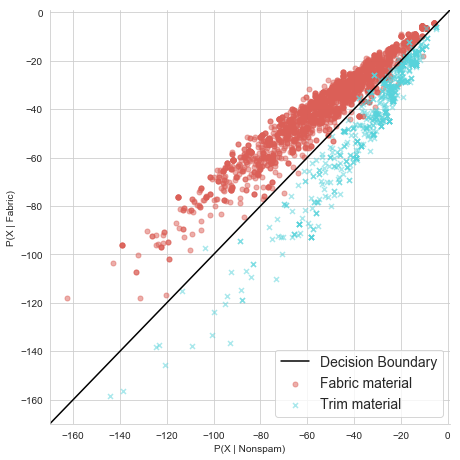

In [778]:
sns.lmplot(x = xaxis_label, y = yaxis_label, 
           data =summary_df, size = 6.5, 
           fit_reg=False, legend=False, scatter_kws={'alpha': 0.5, 's': 25}, 
           hue = labels, markers = ['o', 'x'], palette = 'hls' )

plt.xlim([-170, 1])
plt.ylim([-170, 1])

plt.plot(linedata, linedata, color = 'black')

plt.legend(('Decision Boundary', 'Fabric material', 'Trim material'), 
           loc='lower right', fontsize = 14)

plt.show()

# False Positives and False Negatives
* The function up.unique() shows the nubmer of value 0 is 2347, the value 1 is 650.

In [779]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([2337,  660]))

### True positives
* It shows, the document is 1, the True, and model also predicts it as 1, True.
* In this case, the material is fabric in CATEGORY, and the prediction also say it is fabric.

In [780]:
true_pos = (y_test == 1)&(prediction == 1)

In [781]:
true_pos.sum()

615

### True negatives
* It shows, the document is 0, the False, and the model also predicts it as 0, False.
* In this case, the material is actually trim in CATEGORY, and the prediction also say it is trim.

In [782]:
true_neg = (y_test == 0)&(prediction ==0)

In [783]:
true_neg.sum()

2318

### False positives
* It shows, the document is 0, the False, and model predicts it as 1, True.
* In this case, the material is trim in CATEGORY, and yet prediction says it is fabric.

In [784]:
false_pos = (y_test == 0)&(prediction ==1)

In [785]:
false_pos.sum()

45

### False negtives
* It shows, the document is 1, the True, and model predicts it as 0, False.
* In this case, the material is fabric in CATEGORY, and yet prediction says it is trim.

In [786]:
false_neg = (y_test == 1)&(prediction == 0)

In [787]:
false_neg.sum()

19

In [788]:
(y_test == 1).sum()

635

# Recall Score
* It tells how precisely the model predicting.

In [789]:
recall_score = true_pos.sum() / (y_test == 1).sum()
print('Recall score is {:.2%}'. format(recall_score))

Recall score is 96.85%


# Precision Score
* It tells how much the model will omit the document. More the value close to 1, less the model will omit to fit document.
* It tells the reliability of the model, in other words, how much the model resemble to the relevant documents.
* More the value close to 1, less the model will omit any document.

In [790]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.932


# F-Score or F1 Score
* Closer the value to 1, better the model is.

In [791]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.95
